In [89]:
import pandas as pd
import nltk 
from wordcloud import WordCloud
import spacy
import re
from matplotlib import pyplot as plt
import numpy as np


In [112]:
df = pd.read_csv('train_orig.csv')
pd.set_option('display.max_colwidth', 200)

In [114]:
stopwords  = set(nltk.corpus.stopwords.words('english'))
nlp = spacy.load('en')
MAX_CHARS = 20000

def tokenizer(comment):
    comment = re.sub(r"[\*\"“”\n\\…\+\-\/\=\(\)‘•:\[\]\|’;#]", " ", str(comment))
    comment = re.sub(r"[ ]+", " ", comment)
    comment = re.sub(r"\!+", "!", comment)
    comment = re.sub(r"\,+", ",", comment)
    comment = re.sub(r"\?+", "?", comment)
    if (len(comment) > MAX_CHARS):
        comment = comment[:MAX_CHARS]

    return [x.text for x in nlp.tokenizer(comment) if x.text != " " and x.text not in stopwords]

df['tokenized'] = df['question_text'].apply(tokenizer)

In [115]:
sincere = df[df['target'] == 0]
insincere = df[df['target'] == 1]

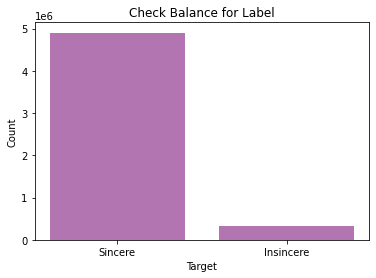

In [125]:
height = [sincere.size, insincere.size]
bars = ('Sincere', 'Insincere')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))

plt.title('Check Balance for Label')
plt.xlabel('Target')
plt.ylabel('Count')

plt.xticks(y_pos, bars)

plt.show()

In [116]:
sincere.head(10)

,qid,question_text,target,tokenized
0,00002165364db923c7e6,How did Quebec nationalists see their province as a nation in the 1960s?,0,"[How, Quebec, nationalists, see, province, nation, 1960s, ?]"
1,000032939017120e6e44,"Do you have an adopted dog, how would you encourage people to adopt and not shop?",0,"[Do, adopted, dog, ,, would, encourage, people, adopt, shop, ?]"
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity affect space geometry?,0,"[Why, velocity, affect, time, ?, Does, velocity, affect, space, geometry, ?]"
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg hemispheres?,0,"[How, Otto, von, Guericke, used, Magdeburg, hemispheres, ?]"
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain bike by just changing the tyres?,0,"[Can, I, convert, montra, helicon, D, mountain, bike, changing, tyres, ?]"
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?",0,"[Is, Gaza, slowly, becoming, Auschwitz, ,, Dachau, Treblinka, Palestinians, ?]"
6,00005059a06ee19e11ad,"Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?",0,"[Why, Quora, automatically, ban, conservative, opinions, reported, ,, liberal, views, ?]"
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off? Germs are everywhere.,0,"[Is, crazy, I, wash, wipe, groceries, ?, Germs, everywhere, .]"
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?",0,"[Is, thing, dressing, moderately, ,, ,, different, dressing, modestly, ?]"
9,00006e6928c5df60eacb,"Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something go your way an...",0,"[Is, ever, phase, wherein, became, ignorant, people, loved, ,, completely, disregarding, feelings, lives, get, something, go, way, feel, temporarily, ease, ., How, things, change, ?]"


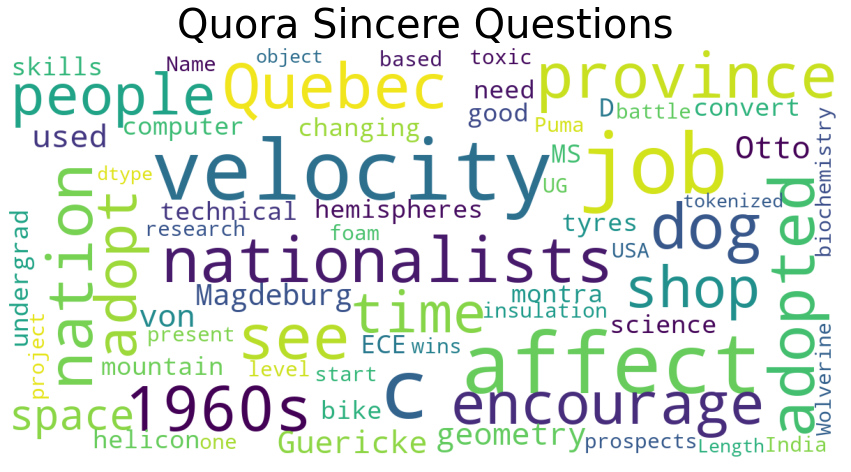

In [117]:
wordcloud = WordCloud(background_color='white',max_words=150,max_font_size=40,scale=3,random_state=50).generate(str(sincere["tokenized"]))

fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')

plt.imshow(wordcloud)
plt.title("Quora Sincere Questions", fontsize=40)
plt.show()

In [118]:
insincere.head(10)

,qid,question_text,target,tokenized
22,0000e91571b60c2fb487,Has the United States become the largest dictatorship in the world?,1,"[Has, United, States, become, largest, dictatorship, world, ?]"
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents? Dark skin babies or light skin babies?,1,"[Which, babies, sweeter, parents, ?, Dark, skin, babies, light, skin, babies, ?]"
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?,1,"[If, blacks, support, school, choice, mandatory, sentencing, criminals, n't, vote, Republican, ?]"
114,00052793eaa287aff1e1,"I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?",1,"[I, gay, boy, I, love, cousin, boy, ., He, sexy, ,, I, nt, know, ., He, hot, ,, I, want, see, di, ., What, I, ?]"
115,000537213b01fd77b58a,Which races have the smallest penis?,1,"[Which, races, smallest, penis, ?]"
119,00056d45a1ce63856fc6,Why do females find penises ugly?,1,"[Why, females, find, penises, ugly, ?]"
127,0005de07b07a17046e27,How do I marry an American woman for a Green Card? How much do they charge?,1,"[How, I, marry, American, woman, Green, Card, ?, How, much, charge, ?]"
144,00068875d7c82a5bcf88,"Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",1,"[Why, Europeans, say, 're, superior, race, ,, fact, took, 2,000, years, mid, 19th, century, surpass, China, 's, largest, economy, ?]"
156,0006ffd99a6599ff35b3,Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?,1,"[Did, Julius, Caesar, bring, tyrannosaurus, rex, campaigns, frighten, Celts, submission, ?]"
167,00075f7061837807c69f,In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually restricted the ability of states to make their own laws?,1,"[In, manner, Republican, backing, ', states, rights, ', hypocritical, ways, actually, restricted, ability, states, make, laws, ?]"


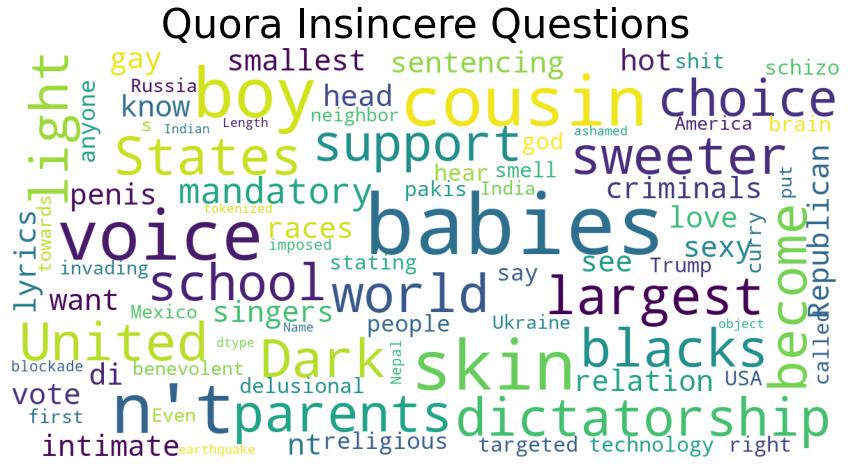

In [119]:
wordcloud = WordCloud(background_color='white',max_words=150,max_font_size=40,scale=3,random_state=50).generate(str(insincere["tokenized"]))

fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')

plt.imshow(wordcloud)
plt.title("Quora Insincere Questions", fontsize=40)
plt.show()